In [1]:
import numpy as np
import pandas as pd
import obspy
import obspy.signal.filter
import sys           
sys.path.append("/data/wsd01/pnwstore/")
from pnwstore.mseed import WaveformClient
client = WaveformClient()
import datetime
import scipy
import glob
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_activity = pd.read_csv('mt_st_helens_activity.txt', header=1, skiprows=9)
df_activity.set_index('UTC',inplace=True)
df_activity.index = pd.to_datetime(df_activity.index).tz_localize(None)
df_activity

,activity
UTC,
2004-09-23 09:00:00,s
2004-09-25 19:00:00,q
2004-09-26 00:00:00,c
2004-10-01 19:02:00,a
2004-10-02 19:14:00,a
2004-10-02 19:14:00,t
2004-10-03 09:50:00,t
2004-10-03 11:30:00,et
2004-10-03 17:40:00,a


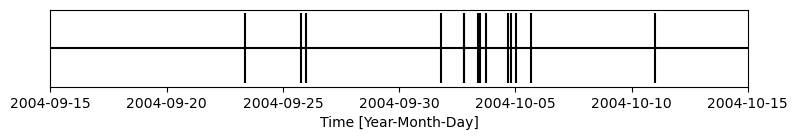

In [41]:
plt.rcParams["figure.figsize"] = (9,1)

ax = plt.axes()
plt.hlines(0,datetime.datetime(2004,9,1), datetime.datetime(2004,10,31), 'black')
for idx in df_activity.index[:14]:
    plt.vlines(idx,-1, 1, 'black')

start = datetime.datetime(2004,9,15)
end = datetime.datetime(2004,10,15)

xticks = pd.date_range(start=start, end=end, freq='5D')

ax.set_xticks(xticks) # tick position
ax.set_xticklabels([i.date() for i in xticks]) # tick labels
ax.set_xlim(start, end)
#ax.set_xticks(rotation=45)
ax.set_xlabel('Time [Year-Month-Day]')
plt.yticks([], [])
plt.savefig('eruption_history_2004.png', bbox_inches='tight', dpi=300)

In [22]:
pd.date_range(start=start, end=end, freq='5D')

DatetimeIndex(['2004-09-15', '2004-09-20', '2004-09-25', '2004-09-30',
               '2004-10-05', '2004-10-10', '2004-10-15'],
              dtype='datetime64[ns]', freq='5D')

In [ ]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(1,1, sharex=True, figsize=(12, 4))

ax.plot(df_res['rsam'], label='RSAM')
ax.plot(df_res['mf'], label='MF')
ax.plot(df_res['hf'], label='HF')
ax.plot(np.nan, label='DSAR')

ax2 = ax.twinx()
ax2.plot(df_res['dsar'], label='DSAR', color='C3')
ax.set_xlabel('Time [Year-Month]')
ax.set_ylabel('RSAM')
ax2.set_ylabel('DSAR')

#ax.axvline(df_activity.index[0], color='black', linewidth=3, label='Eruption')
for idx in df_activity.index[:14]:
    ax.axvline(idx, color='black', linewidth=1)
ax.set_xlim(datetime.datetime(2004,9,1),datetime.datetime(2004,9,30))
#ax.set_ylim(-5e10,1.4e12)
#ax2.set_ylim(1,5.5)
# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 6))

#ax.legend(ncol=2)
#fig.savefig('../plots/2004_sep_taper_res6.png', bbox_inches='tight', dpi=300)